# Pymaceuticals Inc.
---

### Analysis

Based on the summary data frame, the Capomulin and Ramicane drug have the top two best results. These two drugs also had the most # of observed mouse timepoints. 

The plot of tumor volume vs time point for a single mouse treated with Capomulin shows the effectiveness of the drug since the tumor volume generally decreases as the days go by. 

The correlation coefficient between mouse weight and ave tumor volume for the entire Capomulin regimen is 0.84, which is close to 1. Thus, these two variables have an almost direct relationship. 
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.

unique_mice_count = merged_df["Mouse ID"].nunique()
unique_mice_count


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicated syntax from w3schools

duplicate_mice = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = merged_df[merged_df[["Mouse ID", "Timepoint"]].duplicated()]
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df["Mouse ID"] != "g989"]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_df = cleaned_df.groupby("Drug Regimen")
mean = drug_regimen_df["Tumor Volume (mm3)"].mean()
median = drug_regimen_df["Tumor Volume (mm3)"].median()
variance = drug_regimen_df["Tumor Volume (mm3)"].var()
std_dev = drug_regimen_df["Tumor Volume (mm3)"].std()
sem = drug_regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame(
    {"Mean Tumor Volume": mean, "Median Tumor Volume": median,
     "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std_dev,
     "Tumor Volume Std. Err.": sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary_df = drug_regimen_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

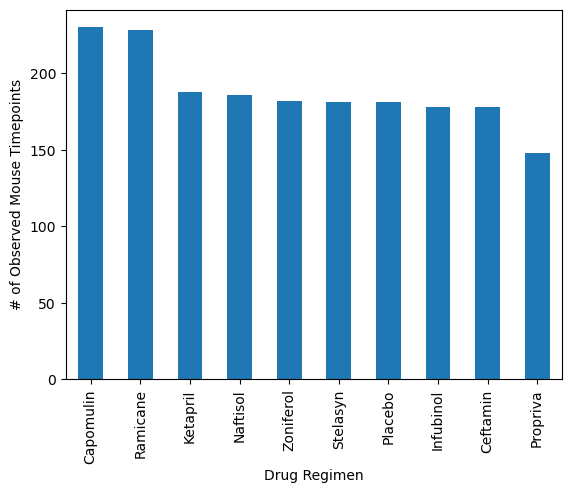

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# cleaned_df.plot.bar(x="Drug Regimen", y="Mouse ID")
drug_and_timepoint = cleaned_df[["Drug Regimen","Timepoint"]]
drug_and_timepoint = drug_and_timepoint.set_index("Drug Regimen")

drug_regimens = cleaned_df["Drug Regimen"].value_counts()

drug_regimens.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

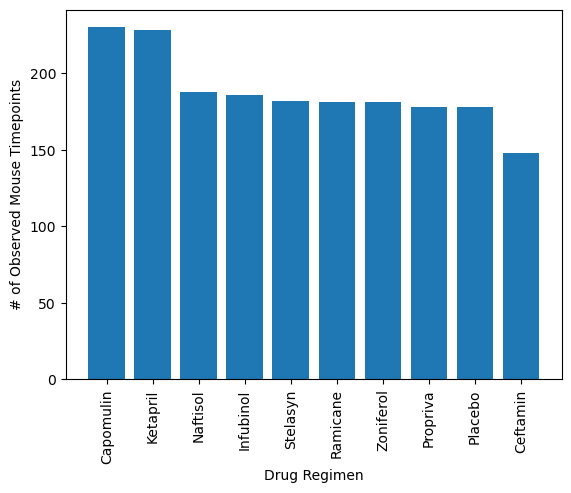

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_and_timepoint = cleaned_df[["Drug Regimen","Timepoint"]]
drug_and_timepoint = drug_and_timepoint.set_index("Drug Regimen")
drug_and_timepoint

drug_regimens = cleaned_df["Drug Regimen"].value_counts()
drug_regimens

drug_names = cleaned_df["Drug Regimen"].unique()

x_axis = np.arange(len(drug_regimens))

ticks = [value for value in x_axis]
plt.xticks(ticks, drug_names, rotation=90)
plt.bar(x_axis, drug_regimens)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

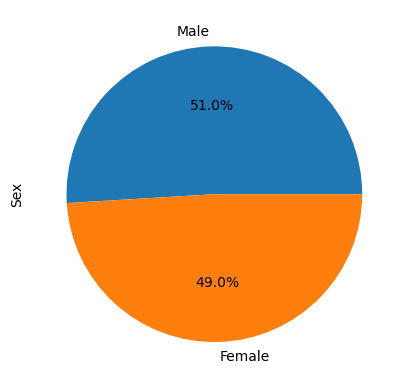

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_df["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


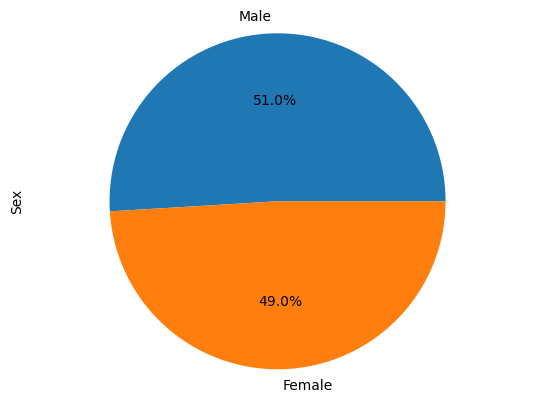

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male", "Female"]
gender_counts = cleaned_df["Sex"].value_counts()
plt.pie(gender_counts, labels = genders, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# final_four_df = cleaned_df[cleaned_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# final_four_df

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = cleaned_df.groupby("Mouse ID").max("Timepoint")

# reset index
max_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df2 = pd.merge(max_timepoint_df, merged_df, on=["Mouse ID", "Timepoint"])
merged_df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Age_months_x,Weight (g)_x,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen,Sex,Age_months_y,Weight (g)_y
0,a203,45,67.973419,2,20,23,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,21,25,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,17,29,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,20,28,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,16,29,63.440686,1,Stelasyn,Female,16,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_df2["Tumor Volume (mm3)_x"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol = merged_df2.loc[merged_df2["Drug Regimen"] == treatment, "Tumor Volume (mm3)_x"]
    
    # Add subset
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


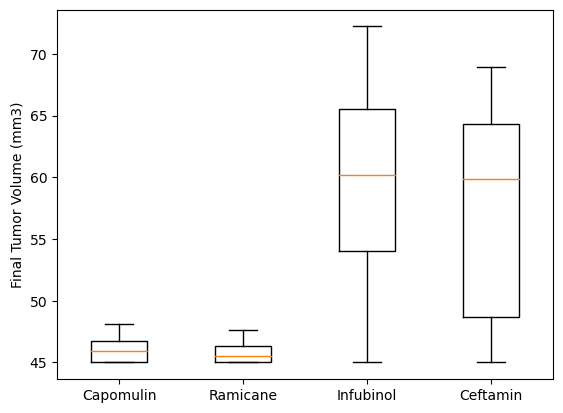

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

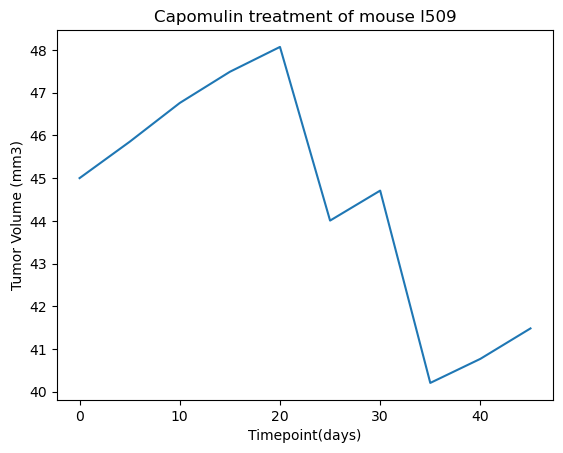

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = cleaned_df.loc[cleaned_df["Mouse ID"]=="l509", :]
l509_df
l509_tumor_timepoints = l509_df[["Timepoint", "Tumor Volume (mm3)"]]
l509_tumor_timepoints.set_index("Timepoint")
plt.plot(l509_tumor_timepoints.set_index("Timepoint"))
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

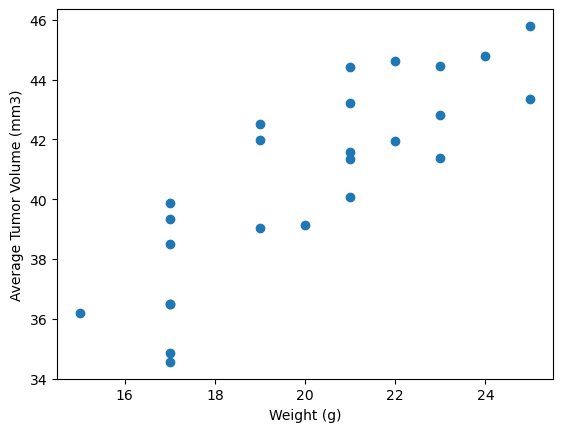

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_df2 = capomulin_df[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
capomulin_mean = capomulin_df2.groupby("Mouse ID").mean()

plt.scatter(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

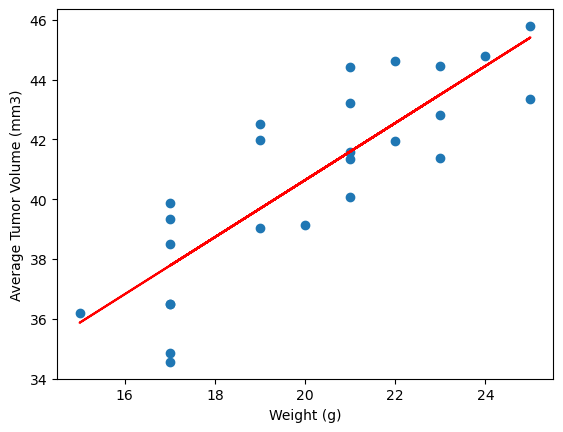

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

cor_co = round((st.pearsonr(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"]))[0],2)
print(f"The correlation coefficient between mouse weight and the average tumor volume is {cor_co}")

c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])

c_fit = c_slope * (capomulin_mean["Weight (g)"]) + c_int

plt.scatter(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])
plt.plot(capomulin_mean["Weight (g)"], c_fit, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")